Tarea 1: memoria de cálculo

In [2716]:
# Importar librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [2717]:
# Funciones matemáticas útiles

# Funciones matemáticas

def sen(x):
    return np.sin(np.deg2rad(x))

def cos(x):
    return np.cos(np.deg2rad(x))

def tan(x):
    return np.tan(np.deg2rad(x))

def arcos(x):
    return np.rad2deg(np.arccos(x))

def adsin(x):
    return np.rad2deg(np.arcsin(x))

def adtan(x):
    return np.rad2deg(np.arctan(x))


# Funciones útiles para geometría solar

def declinacion(dia):
    return 23.45*sen(360*(284+dia)/366)

def ecuacion_del_tiempo(dia):
    b = (dia-1)*360/365
    E = 229.2*10**(-5)*(7.5+186*cos(b)-3200.7*sen(b)-1461.5*cos(2*b)-4089*sen(2*b))
    return E

def long_std(utc):
    return (utc)*15

def t_solar(t_local, long_loc, long_std, dia):
    return t_local*60+4*(long_loc-long_std)+ecuacion_del_tiempo(dia)

def ang_horario(t):
    return -180+t*15/60

def cenit_solar(lat, dec, w):
    return np.rad2deg(np.arccos(cos(lat)*cos(dec)*cos(w)+sen(lat)*sen(dec)))

def azimut_solar(w, cen, dec, lat):
    return np.rad2deg(np.sign(w)*np.abs(np.arccos((cos(cen)*sen(lat)-sen(dec))/(sen(cen)*cos(lat)))))+180

def incidencia(cenit, beta, azimut, acip):
    return np.rad2deg(np.arccos(cos(cenit)*cos(beta)+sen(cenit)*sen(beta)*cos(azimut-acip)))

Pregunta 1

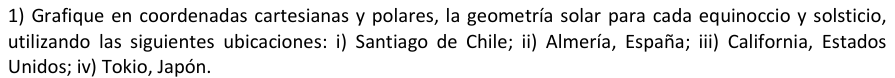

Santiago de Chile

In [2718]:
# Solsticio de verano

# En Santiago de Chile el solsticio de verano es el 21 de diciembre y el solsticio de invierno es el 21 de junio.

# El equinoccio, por su parte, es el 20 de marzo y el 23 de septiembre. Por simplicidad, se tomará el equinoccio de marzo.

# Tomamos las latitudes y longitudes de Santiago:

longstgo = -70
latstgo = -33.5
utc = -4

# Tomamos cada uno de los días pedidos:

solsticio_verano = pd.date_range(start='21/12/2025', end='22/12/2025', freq='12min')
equinoccio_marzo = pd.date_range(start='20/3/2025', end='21/3/2025', freq='12min')
solsticio_invierno = pd.date_range(start='21/6/2025', end='22/6/2025', freq='12min')

In [2719]:
elevacion_verano = []
azimut_verano = []
indicencia_verano = []
cenit_verano = [] # listas vacías para guardar los datos

horas = [] # lista vacía para graficar después

i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in solsticio_verano:
    declin = declinacion(solsticio_verano.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longstgo, long_std(-4), solsticio_verano.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latstgo, declin, w)
    azimut = azimut_solar(w, cenit, declin, latstgo)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_verano.append(90-cenit)
    azimut_verano.append(azimut)
    indicencia_verano.append(incid)
    cenit_verano.append(cenit)

for i in elevacion_verano:
    if i < 0:
        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_verano:
    if i > 90:
        cenit_verano[cenit_verano.index(i)] = 90 # reemplazar los mayores a 90 por 90

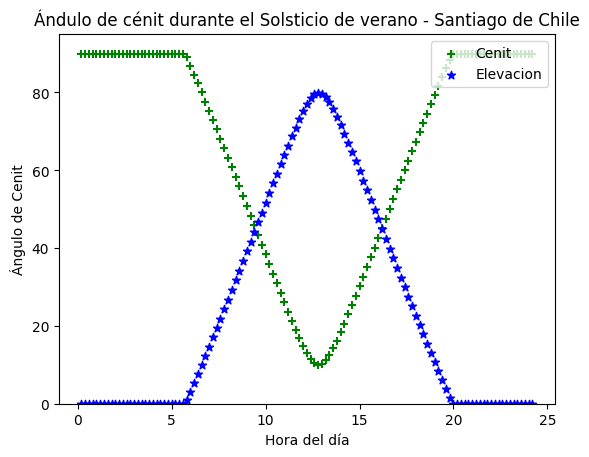

In [2720]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_verano, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_verano, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de verano - Santiago de Chile')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

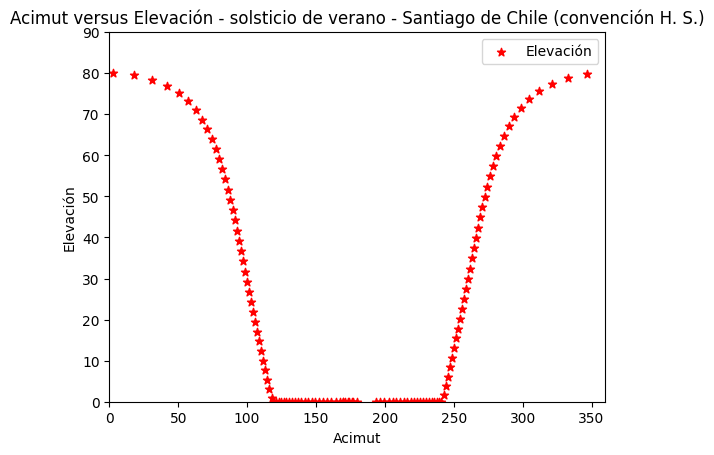

In [2721]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

# azimut_verano_c_n = []

#for x in azimut_verano:
#    if  0 <= x <= 180:
#        azimut_verano_c_n.append(x+180) # convención hemisferio sur
#    else:
#        azimut_verano_c_n.append(x - 180) # convención hemisferio sur

#azimut_verano_2 = azimut_verano.copy()

#for x in azimut_verano_2:
    
   # azimut_verano_2[azimut_verano_2.index(x)] = x - 180


plt.figure()
plt.scatter(azimut_verano, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Santiago de Chile (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

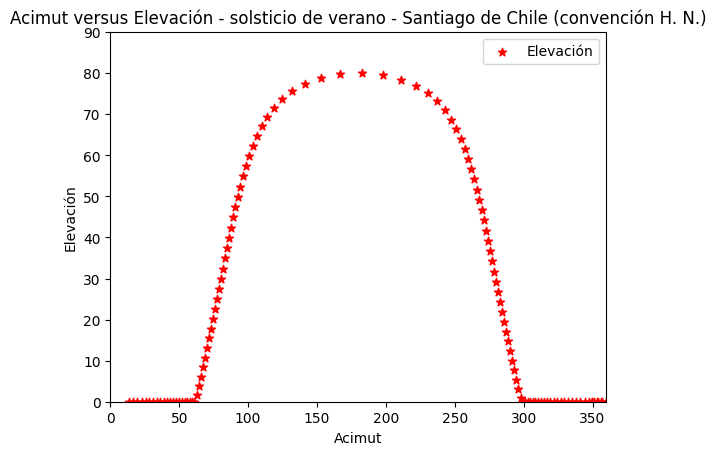

In [2722]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_verano_c_n = []

for x in azimut_verano:
    if  0 <= x <= 180:
        azimut_verano_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_verano_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_verano_c_n, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Santiago de Chile (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

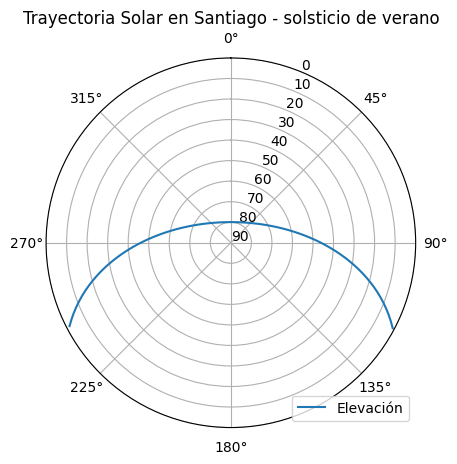

In [2723]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Sur

elevacion_verano_2 = np.array(elevacion_verano) > 0
az_rad1m = np.radians(np.array(azimut_verano))[elevacion_verano_2]
elevacion_verano_2 = np.array(elevacion_verano)[elevacion_verano_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_verano_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Santiago - solsticio de verano")
ax.legend(loc= "lower right")
plt.show()

In [2724]:
# Ahora, para el solsticio de invierno

elevacion_invierno = []
azimut_invierno = []
indicencia_invierno  = []
cenit_invierno  = [] # lista vacía para guardar los datos

# horas = list(range(0, 25)) # esto es para graficar después

i = 0

horas = [] # esto es para graficar después

while i <= 24:
    i = i + 0.2
    horas.append(i)


for hora in solsticio_invierno :
    declin = declinacion(solsticio_invierno.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longstgo, long_std(-4), solsticio_invierno.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latstgo, declin, w)
    azimut = azimut_solar(w, cenit, declin, latstgo)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_invierno.append(90-cenit)
    azimut_invierno.append(azimut)
    indicencia_invierno.append(incid)
    cenit_invierno.append(cenit)

for i in elevacion_invierno:
    if i < 0:
        elevacion_invierno[elevacion_invierno.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_invierno:
    if i > 90:
        cenit_invierno[cenit_invierno.index(i)] = 90 # reemplazar los mayores a 90 por 90

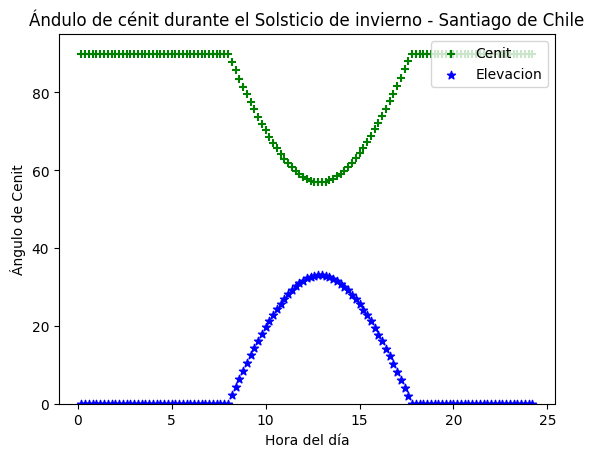

In [2725]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
plt.scatter(horas, cenit_invierno, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_invierno, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de invierno - Santiago de Chile')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

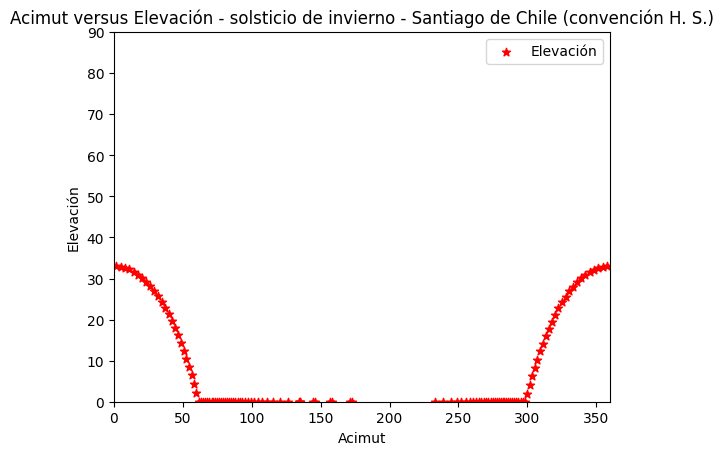

In [2726]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

"""azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio sur
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio sur
"""
plt.figure()
plt.scatter(azimut_invierno, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Santiago de Chile (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

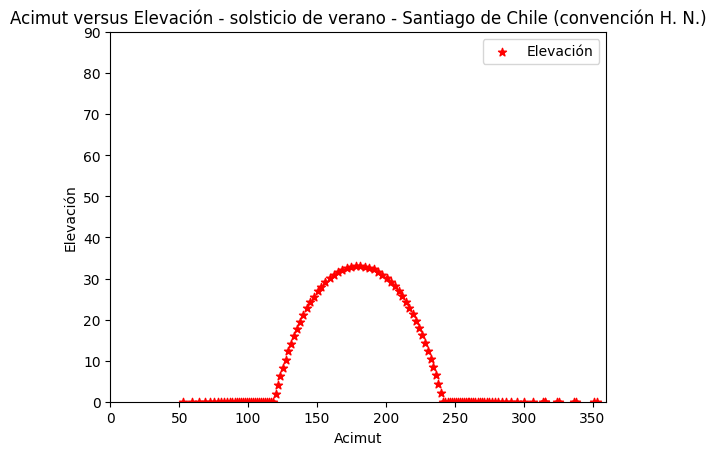

In [2727]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_invierno_c_n, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Santiago de Chile (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

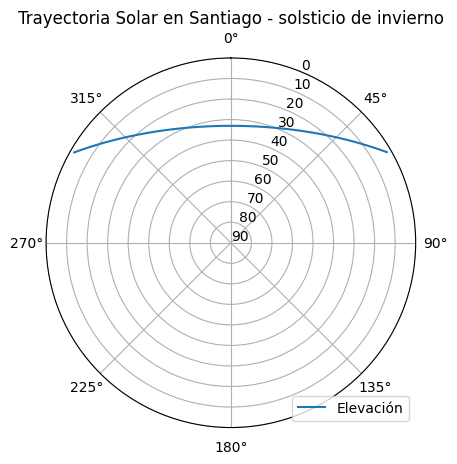

In [2728]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Sur

elevacion_invierno_2 = np.array(elevacion_invierno) > 0
az_rad1m = np.radians(np.array(azimut_invierno))[elevacion_invierno_2]
elevacion_invierno_2 = np.array(elevacion_invierno)[elevacion_invierno_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_invierno_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Santiago - solsticio de invierno")
ax.legend(loc= "lower right")
plt.show()

In [2729]:
# Finalmente, para el equinoccio de marzo

elevacion_equinoccio = []
azimut_equinoccio = []
indicencia_equinoccio = []
cenit_equinoccio = [] # lista vacía para guardar los datos

horas = [] # lista vacía para graficar después
i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in equinoccio_marzo:
    declin = declinacion(equinoccio_marzo.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longstgo, long_std(-4), equinoccio_marzo.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latstgo, declin, w)
    azimut = azimut_solar(w, cenit, declin, latstgo)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_equinoccio.append(90-cenit)
    azimut_equinoccio.append(azimut)
    indicencia_equinoccio.append(incid)
    cenit_equinoccio.append(cenit)

for i in elevacion_equinoccio:
    if i < 0:
        elevacion_equinoccio[elevacion_equinoccio.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_equinoccio:
    if i > 90:
        cenit_equinoccio[cenit_equinoccio.index(i)] = 90 # reemplazar los mayores a 90 por 90


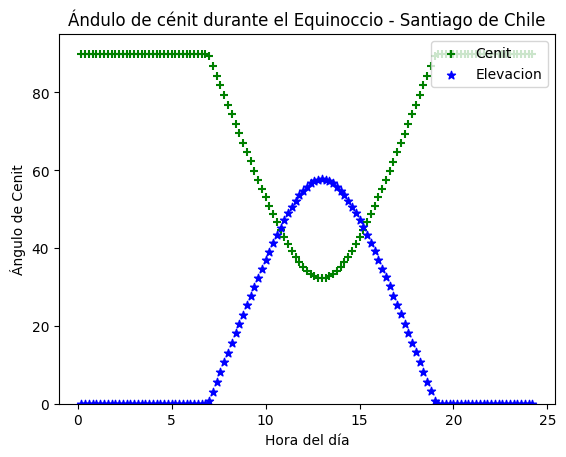

In [2730]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_equinoccio, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_equinoccio, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Equinoccio - Santiago de Chile')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

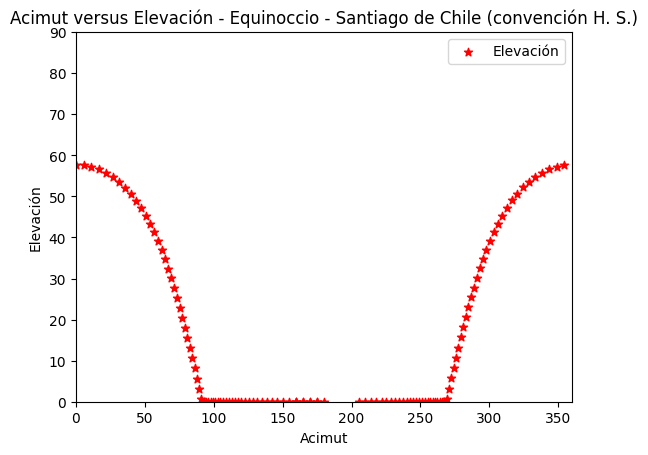

In [2731]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

plt.figure()
plt.scatter(azimut_equinoccio, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Santiago de Chile (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

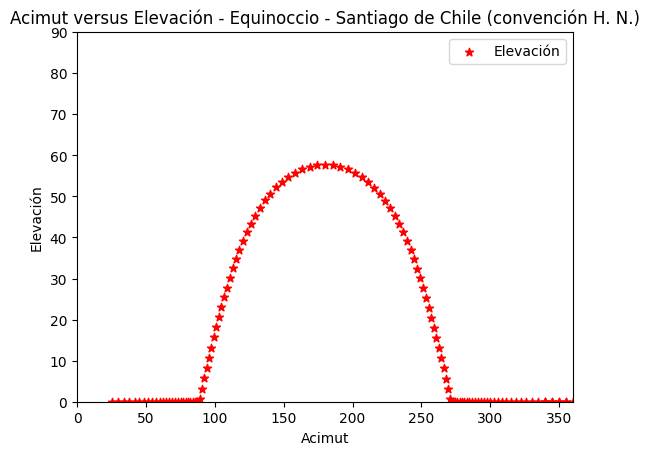

In [2732]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_equinoccio_c_n = []

for x in azimut_equinoccio:
    if  0 <= x <= 180:
        azimut_equinoccio_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_equinoccio_c_n, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Santiago de Chile (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

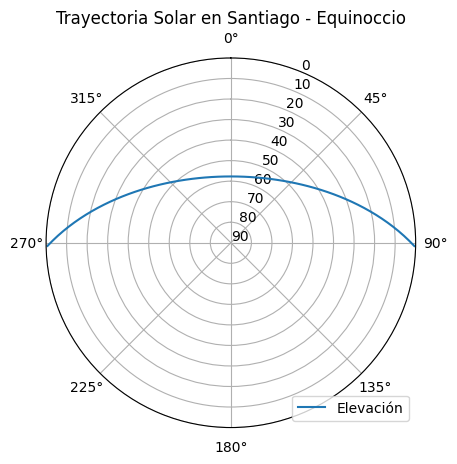

In [2733]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Sur

elevacion_equinoccio_2 = np.array(elevacion_equinoccio) > 0
az_rad1m = np.radians(np.array(azimut_equinoccio))[elevacion_equinoccio_2]
elevacion_equinoccio_2 = np.array(elevacion_equinoccio)[elevacion_equinoccio_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_equinoccio_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Santiago - Equinoccio")
ax.legend(loc= "lower right")
plt.show()

Almería, España

In [2734]:
# En Almería el solsticio de invierno es el 21 de diciembre y el solsticio de verano es el 21 de junio.

# El equinoccio, por su parte, es el 20 de marzo y el 23 de septiembre. Por simplicidad, se tomará el equinoccio de marzo.

# Tomamos las latitudes y longitudes de Almería:

longalmeria = -2.5
latalmeria = 36.8
utc = 2

# Tomamos cada uno de los días pedidos, ahora el solsticio de verano e invierno se invierten:

solsticio_verano = pd.date_range(start='21/6/2025', end='22/6/2025', freq='12min')
equinoccio_marzo = pd.date_range(start='20/3/2025', end='21/3/2025', freq='12min')
solsticio_invierno = pd.date_range(start='21/12/2025', end='22/12/2025', freq='12min')

In [2735]:
# Solsticio de verano

elevacion_verano = []
azimut_verano = []
indicencia_verano = []
cenit_verano = [] # lista vacía para guardar los datos

horas = [] # esto es para graficar después

i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)


for hora in solsticio_verano:
    declin = declinacion(solsticio_verano.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longalmeria, long_std(2), solsticio_verano.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latalmeria, declin, w)
    azimut = azimut_solar(w, cenit, declin, latalmeria)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_verano.append(90-cenit)
    azimut_verano.append(azimut)
    indicencia_verano.append(incid)
    cenit_verano.append(cenit)

for i in elevacion_verano:
    if i <= 0:
        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_verano:
    if i > 90:
        cenit_verano[cenit_verano.index(i)] = 90 # reemplazar los mayores a 90 por 90

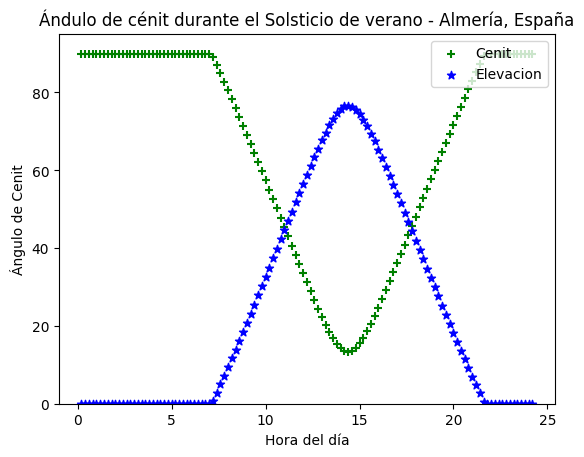

In [2736]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_verano, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_verano, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de verano - Almería, España')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

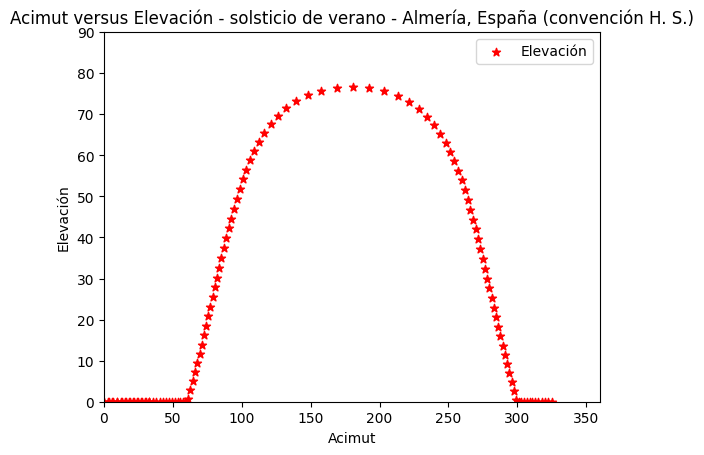

In [2737]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

# azimut_verano_c_n = []

#for x in azimut_verano:
#    if  0 <= x <= 180:
#        azimut_verano_c_n.append(x+180) # convención hemisferio sur
#    else:
#        azimut_verano_c_n.append(x - 180) # convención hemisferio sur

plt.figure()
plt.scatter(azimut_verano, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Almería, España (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

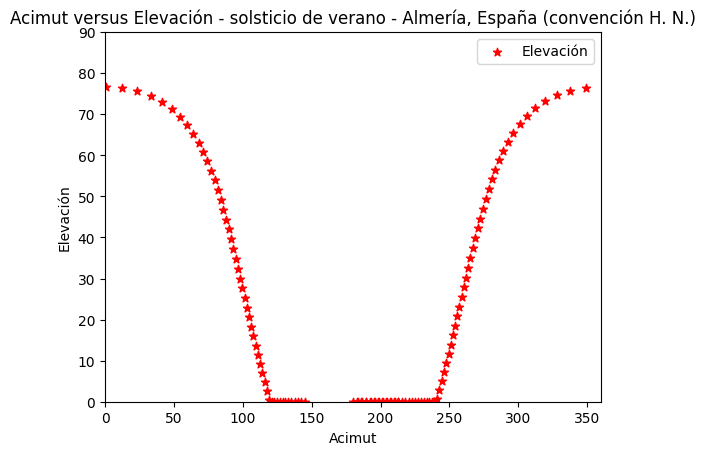

In [2738]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_verano_c_n = []

for x in azimut_verano:
    if  0 <= x <= 180:
        azimut_verano_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_verano_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_verano_c_n, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Almería, España (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

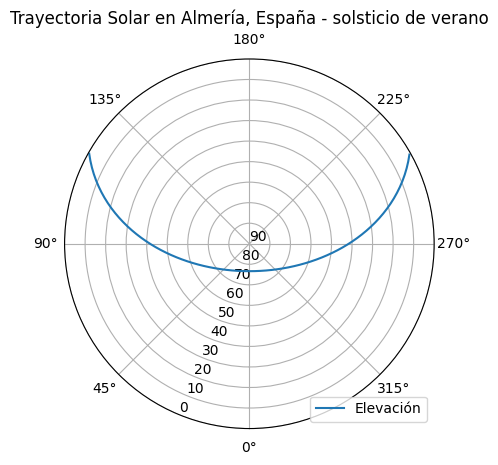

In [2739]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_verano_2 = np.array(elevacion_verano) > 0
az_rad1m = np.radians(np.array(azimut_verano_c_n))[elevacion_verano_2]
elevacion_verano_2 = np.array(elevacion_verano)[elevacion_verano_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_verano_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Almería, España - solsticio de verano")
ax.legend(loc= "lower right")
plt.show()

In [2740]:
# Ahora, para el solsticio de invierno

elevacion_invierno = []
azimut_invierno = []
indicencia_invierno  = []
cenit_invierno  = [] # lista vacía para guardar los datos

# horas = list(range(0, 25)) # esto es para graficar después

i = 0

horas = [] # esto es para graficar después

while i <= 24:
    i = i + 0.2
    horas.append(i)


for hora in solsticio_invierno :
    declin = declinacion(solsticio_invierno.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longalmeria, long_std(2), solsticio_invierno.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latalmeria, declin, w)
    azimut = azimut_solar(w, cenit, declin, latalmeria)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_invierno.append(90-cenit)
    azimut_invierno.append(azimut)
    indicencia_invierno.append(incid)
    cenit_invierno.append(cenit)

for i in elevacion_invierno:
    if i < 0:
        elevacion_invierno[elevacion_invierno.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_invierno:
    if i > 90:
        cenit_invierno[cenit_invierno.index(i)] = 90 # reemplazar los mayores a 90 por 90

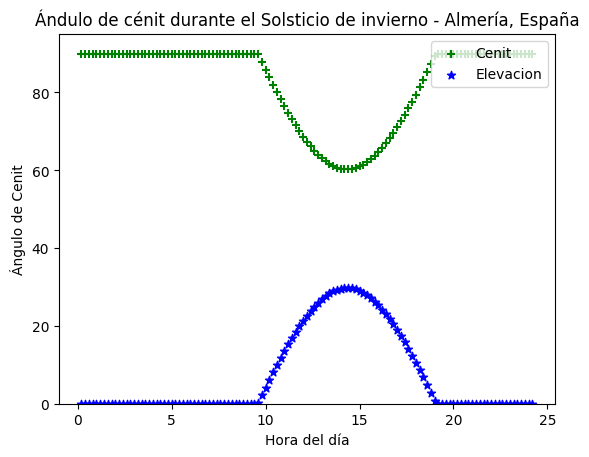

In [2741]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
plt.scatter(horas, cenit_invierno, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_invierno, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de invierno - Almería, España')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

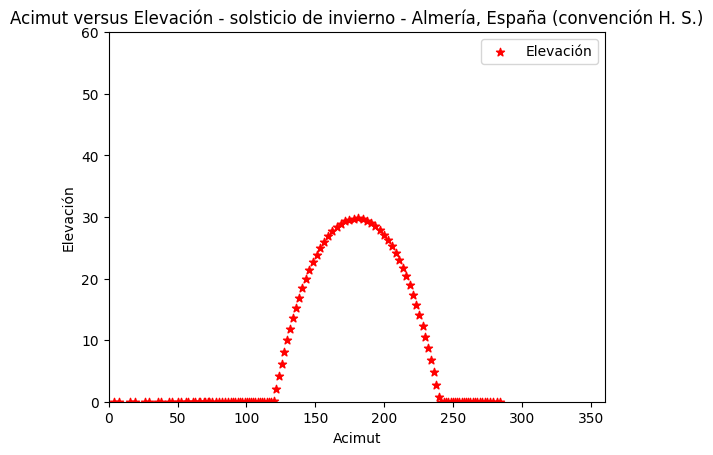

In [2742]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

"""azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio sur
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio sur
"""
plt.figure()
plt.scatter(azimut_invierno, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Almería, España (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

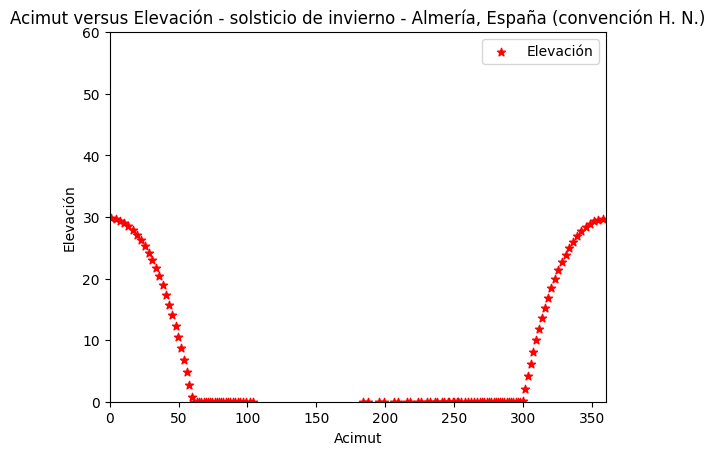

In [2743]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_invierno_c_n, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Almería, España (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

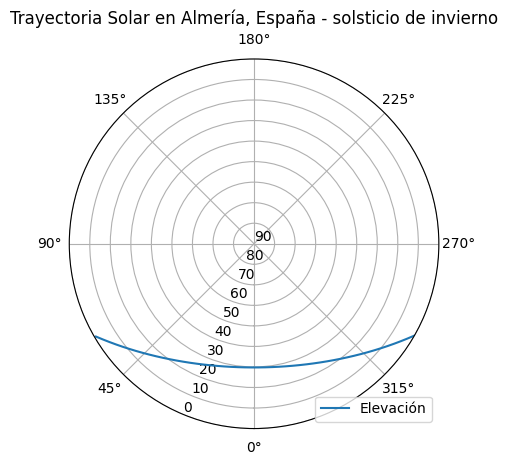

In [2744]:
# La convención en este gráfico es de Hemisferio Norte

elevacion_invierno_2 = np.array(elevacion_invierno) > 0
az_rad1m = np.radians(np.array(azimut_invierno_c_n))[elevacion_invierno_2]
elevacion_invierno_2 = np.array(elevacion_invierno)[elevacion_invierno_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_invierno_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Almería, España - solsticio de invierno")
ax.legend(loc= "lower right")
plt.show()

In [2745]:
# Finalmente, el equinoccio de marzo

elevacion_equinoccio = []
azimut_equinoccio = []
indicencia_equinoccio = []
cenit_equinoccio = [] # lista vacía para guardar los datos

horas = [] # lista vacía para graficar después
i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in equinoccio_marzo:
    declin = declinacion(equinoccio_marzo.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longalmeria, long_std(2), equinoccio_marzo.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latalmeria, declin, w)
    azimut = azimut_solar(w, cenit, declin, latalmeria)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_equinoccio.append(90-cenit)
    azimut_equinoccio.append(azimut)
    indicencia_equinoccio.append(incid)
    cenit_equinoccio.append(cenit)

for i in elevacion_equinoccio:
    if i < 0:
        elevacion_equinoccio[elevacion_equinoccio.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_equinoccio:
    if i > 90:
        cenit_equinoccio[cenit_equinoccio.index(i)] = 90 # reemplazar los mayores a 90 por 90

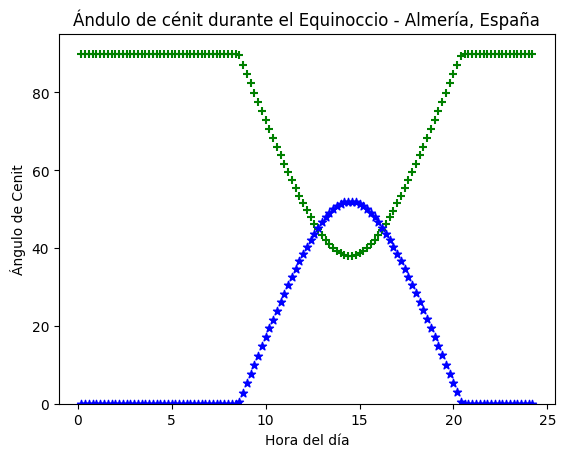

In [2746]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_equinoccio, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_equinoccio, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Equinoccio - Almería, España')
plt.ylim([0, 95])
plt.show()

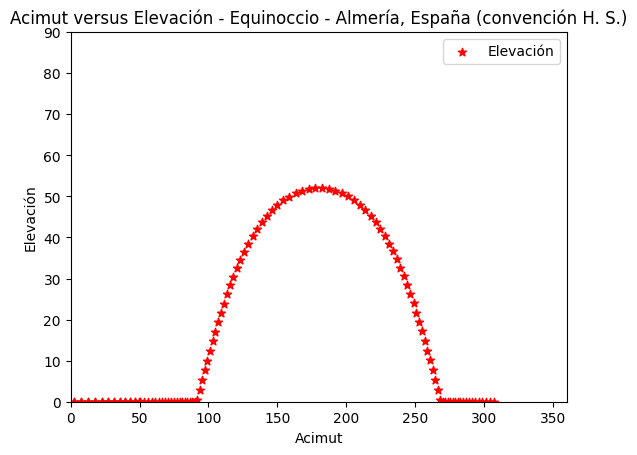

In [2747]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

# azimut_equinoccio_c_n = []

#for x in azimut_equinoccio:
#    if  0 <= x <= 180:
#        azimut_equinoccio_c_n.append(x+180) # convención hemisferio sur
#    else:
#        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio sur

plt.figure()
plt.scatter(azimut_equinoccio, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Almería, España (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

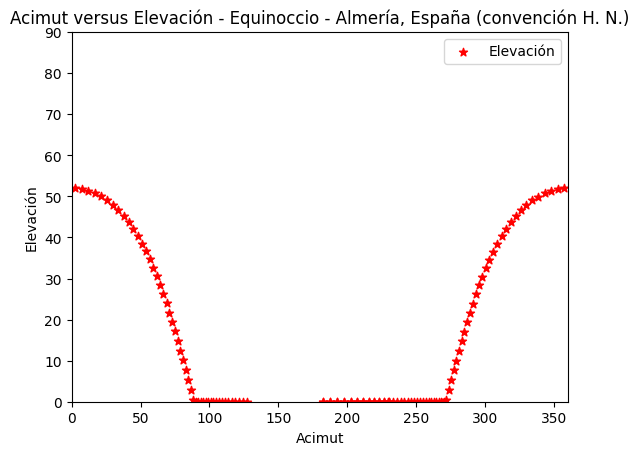

In [2748]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_equinoccio_c_n = []

for x in azimut_equinoccio:
    if  0 <= x <= 180:
        azimut_equinoccio_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_equinoccio_c_n, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Almería, España (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

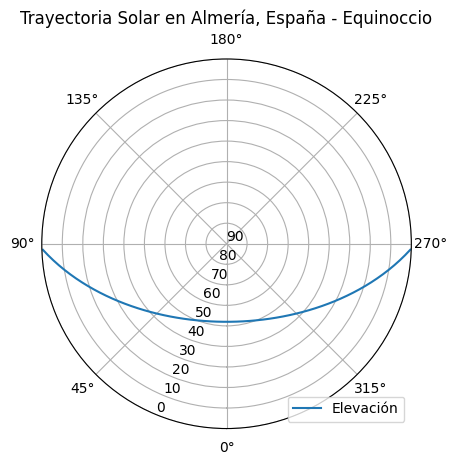

In [2749]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_equinoccio_2 = np.array(elevacion_equinoccio) > 0
az_rad1m = np.radians(np.array(azimut_equinoccio_c_n))[elevacion_equinoccio_2]
elevacion_equinoccio_2 = np.array(elevacion_equinoccio)[elevacion_equinoccio_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_equinoccio_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Almería, España - Equinoccio")
ax.legend(loc= "lower right")
plt.show()

California, EEUU (L.A.)

In [2750]:
# Solsticio de verano

# En California, el solsticio de verano es el 21 de junio y el solsticio de invierno es el 21 de diciembre.

# El equinoccio, por su parte, es el 20 de marzo y el 23 de septiembre. Por simplicidad, se tomará el equinoccio de marzo.

# Tomaremos la ciudad de Los Ángeles, CA como referencia.

longla = -118.25
latla = 34.05
utc = -7

# Tomamos cada uno de los días pedidos:

solsticio_verano = pd.date_range(start='21/6/2025', end='22/6/2025', freq='12min')
equinoccio_marzo = pd.date_range(start='20/3/2025', end='21/3/2025', freq='12min')
solsticio_invierno = pd.date_range(start='21/12/2025', end='22/12/2025', freq='12min')

In [2751]:
elevacion_verano = []
azimut_verano = []
indicencia_verano = []
cenit_verano = [] # listas vacías para guardar los datos

horas = [] # lista vacía para graficar después

i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in solsticio_verano:
    declin = declinacion(solsticio_verano.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longla, long_std(-7), solsticio_verano.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latla, declin, w)
    azimut = azimut_solar(w, cenit, declin, latla)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_verano.append(90-cenit)
    azimut_verano.append(azimut)
    indicencia_verano.append(incid)
    cenit_verano.append(cenit)

for i in elevacion_verano:
    if i < 0:
        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_verano:
    if i > 90:
        cenit_verano[cenit_verano.index(i)] = 90 # reemplazar los mayores a 90 por 90

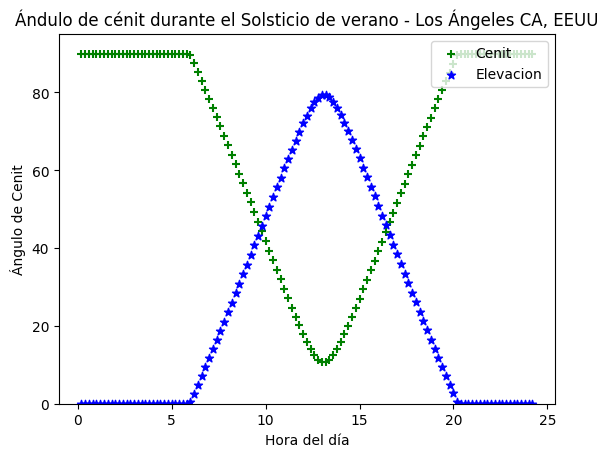

In [2752]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_verano, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_verano, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de verano - Los Ángeles CA, EEUU')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

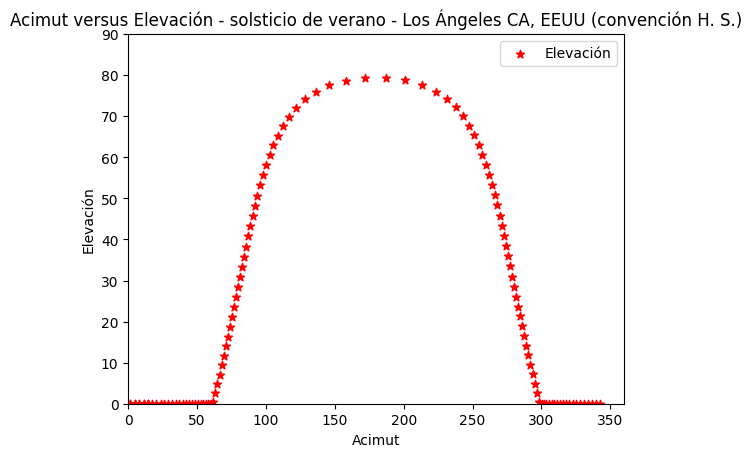

In [2753]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

plt.figure()
plt.scatter(azimut_verano, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Los Ángeles CA, EEUU (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

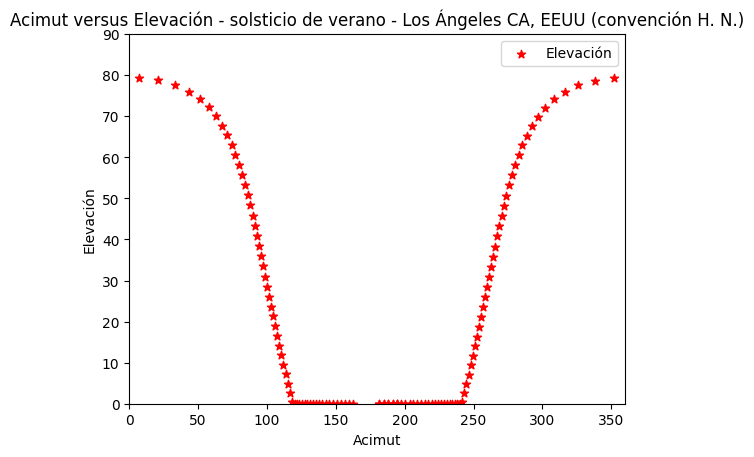

In [2754]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_verano_c_n = []

for x in azimut_verano:
    if  0 <= x <= 180:
        azimut_verano_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_verano_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_verano_c_n, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Los Ángeles CA, EEUU (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

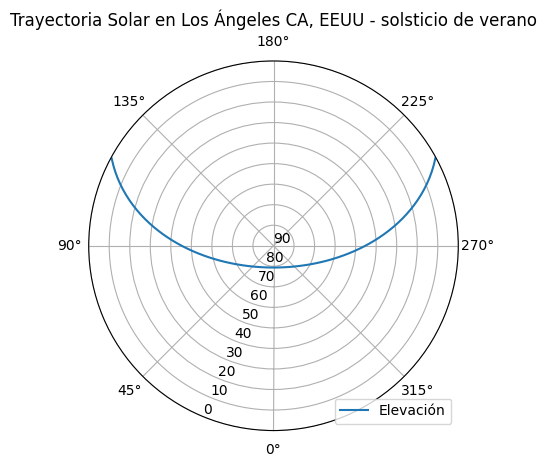

In [2755]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_verano_2 = np.array(elevacion_verano) > 0
az_rad1m = np.radians(np.array(azimut_verano_c_n))[elevacion_verano_2]
elevacion_verano_2 = np.array(elevacion_verano)[elevacion_verano_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_verano_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Los Ángeles CA, EEUU - solsticio de verano")
ax.legend(loc= "lower right")
plt.show()

In [2756]:
# Ahora, para el solsticio de invierno

elevacion_invierno = []
azimut_invierno = []
indicencia_invierno  = []
cenit_invierno  = [] # lista vacía para guardar los datos

# horas = list(range(0, 25)) # esto es para graficar después

i = 0

horas = [] # esto es para graficar después

while i <= 24:
    i = i + 0.2
    horas.append(i)


for hora in solsticio_invierno :
    declin = declinacion(solsticio_invierno.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longla, long_std(-7), solsticio_invierno.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latla, declin, w)
    azimut = azimut_solar(w, cenit, declin, latla)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_invierno.append(90-cenit)
    azimut_invierno.append(azimut)
    indicencia_invierno.append(incid)
    cenit_invierno.append(cenit)

for i in elevacion_invierno:
    if i < 0:
        elevacion_invierno[elevacion_invierno.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_invierno:
    if i > 90:
        cenit_invierno[cenit_invierno.index(i)] = 90 # reemplazar los mayores a 90 por 90

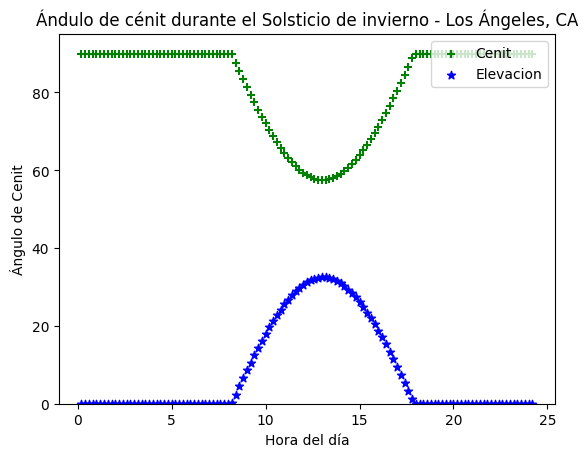

In [2757]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
plt.scatter(horas, cenit_invierno, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_invierno, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de invierno - Los Ángeles, CA')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

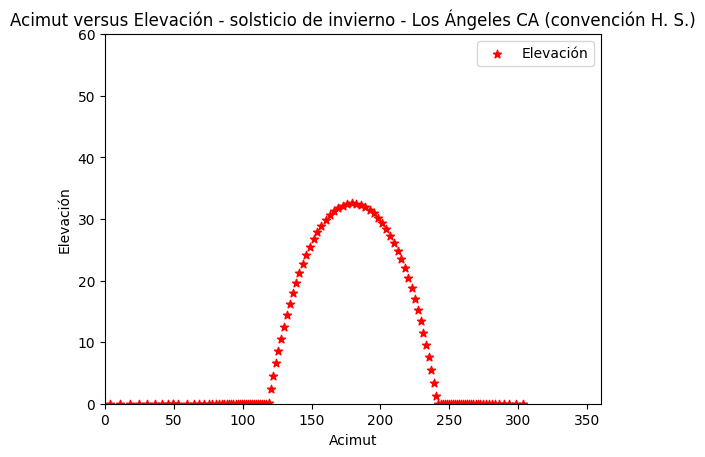

In [2758]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

"""azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio sur
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio sur
"""
plt.figure()
plt.scatter(azimut_invierno, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Los Ángeles CA (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

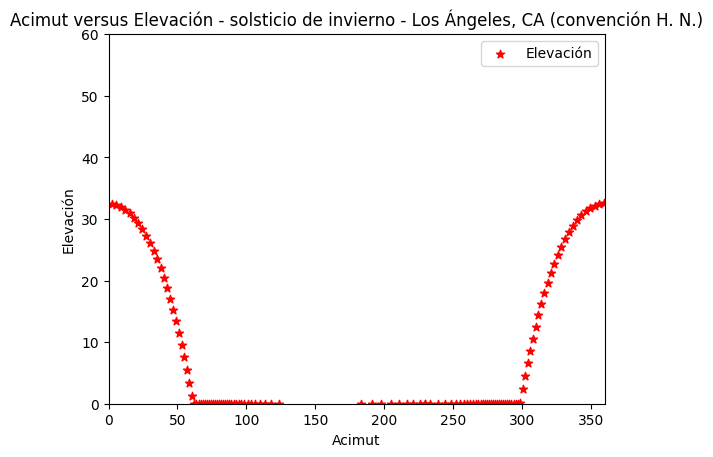

In [2759]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_invierno_c_n, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Los Ángeles, CA (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

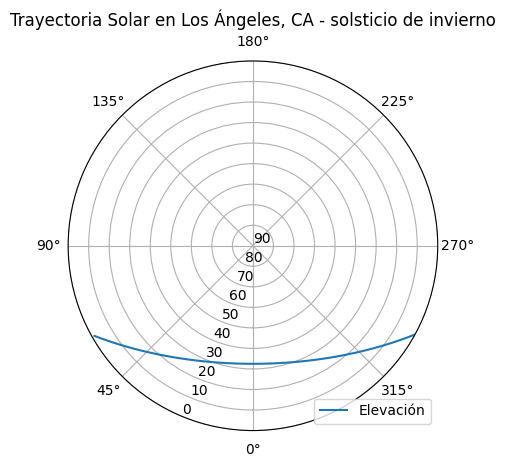

In [2760]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_invierno_2 = np.array(elevacion_invierno) > 0
az_rad1m = np.radians(np.array(azimut_invierno_c_n))[elevacion_invierno_2]
elevacion_invierno_2 = np.array(elevacion_invierno)[elevacion_invierno_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_invierno_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Los Ángeles, CA - solsticio de invierno")
ax.legend(loc= "lower right")
plt.show()

In [2761]:
# Finalmente, el equinoccio de marzo

elevacion_equinoccio = []
azimut_equinoccio = []
indicencia_equinoccio = []
cenit_equinoccio = [] # lista vacía para guardar los datos

horas = [] # lista vacía para graficar después
i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in equinoccio_marzo:
    declin = declinacion(equinoccio_marzo.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longla, long_std(-7), equinoccio_marzo.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latla, declin, w)
    azimut = azimut_solar(w, cenit, declin, latla)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_equinoccio.append(90-cenit)
    azimut_equinoccio.append(azimut)
    indicencia_equinoccio.append(incid)
    cenit_equinoccio.append(cenit)

for i in elevacion_equinoccio:
    if i < 0:
        elevacion_equinoccio[elevacion_equinoccio.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_equinoccio:
    if i > 90:
        cenit_equinoccio[cenit_equinoccio.index(i)] = 90 # reemplazar los mayores a 90 por 90

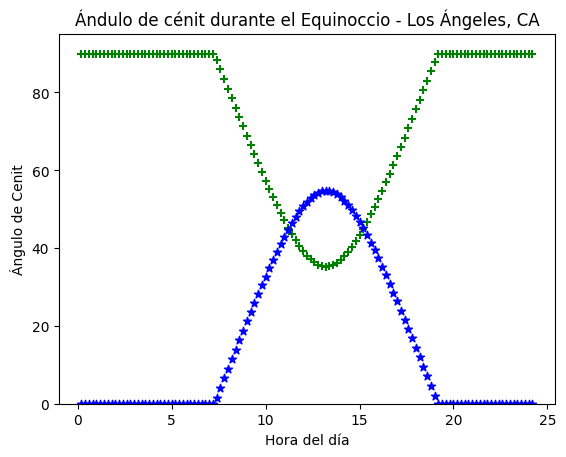

In [2762]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_equinoccio, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_equinoccio, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Equinoccio - Los Ángeles, CA')
plt.ylim([0, 95])
plt.show()

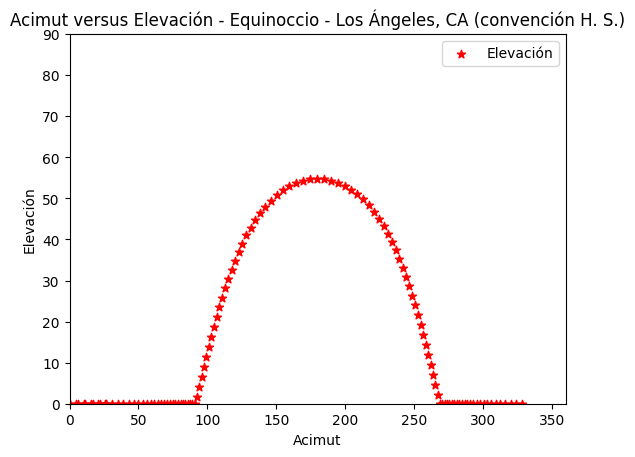

In [2763]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

# azimut_equinoccio_c_n = []

#for x in azimut_equinoccio:
#    if  0 <= x <= 180:
#        azimut_equinoccio_c_n.append(x+180) # convención hemisferio sur
#    else:
#        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio sur

plt.figure()
plt.scatter(azimut_equinoccio, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Los Ángeles, CA (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

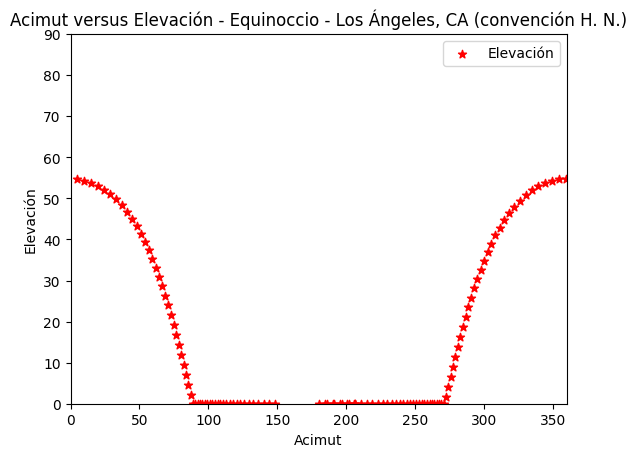

In [2764]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_equinoccio_c_n = []

for x in azimut_equinoccio:
    if  0 <= x <= 180:
        azimut_equinoccio_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_equinoccio_c_n, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Los Ángeles, CA (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

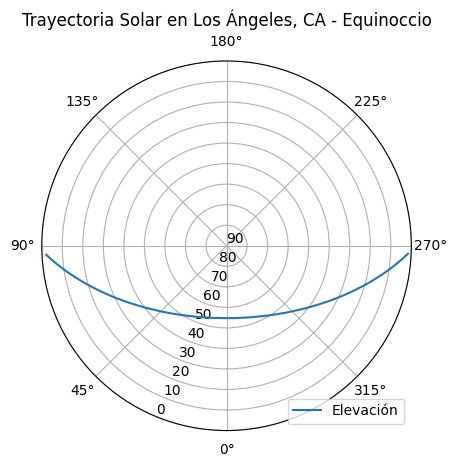

In [2765]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_equinoccio_2 = np.array(elevacion_equinoccio) > 0
az_rad1m = np.radians(np.array(azimut_equinoccio_c_n))[elevacion_equinoccio_2]
elevacion_equinoccio_2 = np.array(elevacion_equinoccio)[elevacion_equinoccio_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_equinoccio_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Los Ángeles, CA - Equinoccio")
ax.legend(loc= "lower right")
plt.show()

Tokio, Japón

In [2766]:
# Solsticio de verano

# En Tokio, el solsticio de verano es el 21 de junio y el solsticio de invierno es el 21 de diciembre.

# El equinoccio, por su parte, es el 20 de marzo y el 23 de septiembre. Por simplicidad, se tomará el equinoccio de marzo.

# Tomaremos la ciudad de Los Ángeles, CA como referencia.

longtokio = 139.76
lattokio = 35.68
utc = 9

# Tomamos cada uno de los días pedidos:

solsticio_verano = pd.date_range(start='21/6/2025', end='22/6/2025', freq='12min')
equinoccio_marzo = pd.date_range(start='20/3/2025', end='21/3/2025', freq='12min')
solsticio_invierno = pd.date_range(start='21/12/2025', end='22/12/2025', freq='12min')

In [2767]:
elevacion_verano = []
azimut_verano = []
indicencia_verano = []
cenit_verano = [] # listas vacías para guardar los datos

horas = [] # lista vacía para graficar después

i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in solsticio_verano:
    declin = declinacion(solsticio_verano.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longtokio, long_std(9), solsticio_verano.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(lattokio, declin, w)
    azimut = azimut_solar(w, cenit, declin, lattokio)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_verano.append(90-cenit)
    azimut_verano.append(azimut)
    indicencia_verano.append(incid)
    cenit_verano.append(cenit)

for i in elevacion_verano:
    if i < 0:
        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_verano:
    if i > 90:
        cenit_verano[cenit_verano.index(i)] = 90 # reemplazar los mayores a 90 por 90

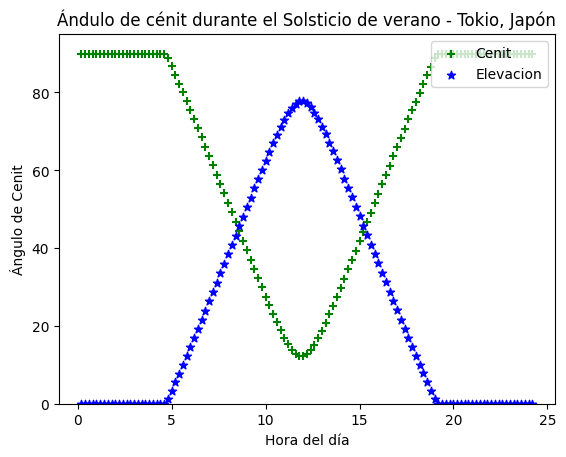

In [2768]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_verano, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_verano, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de verano - Tokio, Japón')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

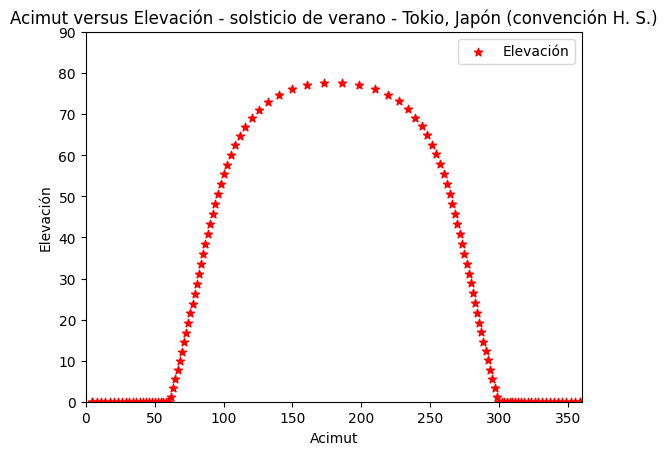

In [2769]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

plt.figure()
plt.scatter(azimut_verano, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Tokio, Japón (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

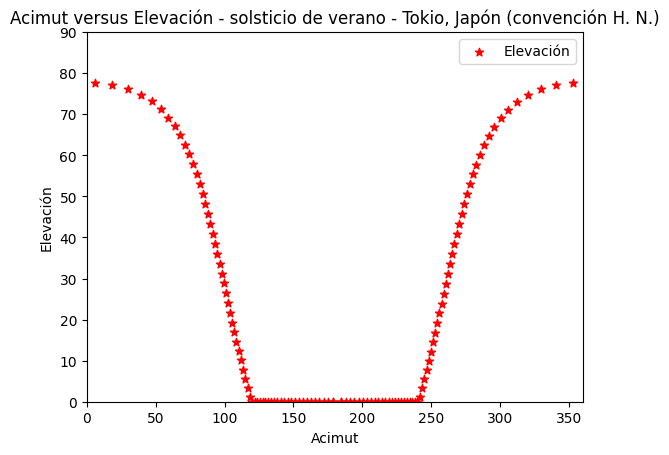

In [2770]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_verano_c_n = []

for x in azimut_verano:
    if  0 <= x <= 180:
        azimut_verano_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_verano_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_verano_c_n, elevacion_verano, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de verano - Tokio, Japón (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

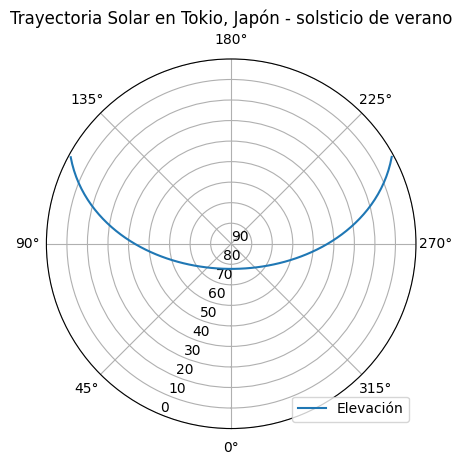

In [2771]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_verano_2 = np.array(elevacion_verano) > 0
az_rad1m = np.radians(np.array(azimut_verano_c_n))[elevacion_verano_2]
elevacion_verano_2 = np.array(elevacion_verano)[elevacion_verano_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_verano_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Tokio, Japón - solsticio de verano")
ax.legend(loc= "lower right")
plt.show()

In [2772]:
# Ahora, para el solsticio de invierno

elevacion_invierno = []
azimut_invierno = []
indicencia_invierno  = []
cenit_invierno  = [] # lista vacía para guardar los datos

# horas = list(range(0, 25)) # esto es para graficar después

i = 0

horas = [] # esto es para graficar después

while i <= 24:
    i = i + 0.2
    horas.append(i)


for hora in solsticio_invierno :
    declin = declinacion(solsticio_invierno.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longtokio, long_std(9), solsticio_invierno.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(lattokio, declin, w)
    azimut = azimut_solar(w, cenit, declin, lattokio)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_invierno.append(90-cenit)
    azimut_invierno.append(azimut)
    indicencia_invierno.append(incid)
    cenit_invierno.append(cenit)

for i in elevacion_invierno:
    if i < 0:
        elevacion_invierno[elevacion_invierno.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_invierno:
    if i > 90:
        cenit_invierno[cenit_invierno.index(i)] = 90 # reemplazar los mayores a 90 por 90

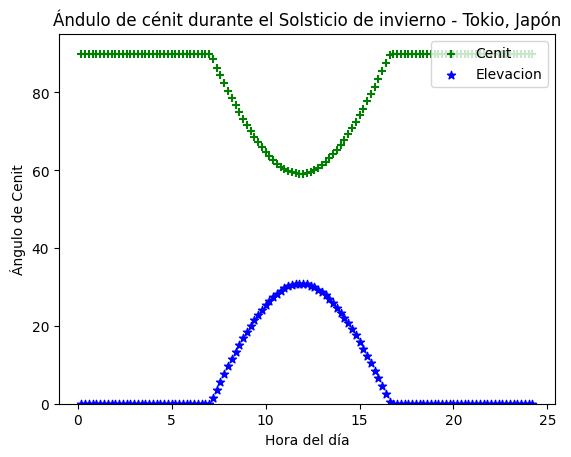

In [2773]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
plt.scatter(horas, cenit_invierno, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_invierno, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Solsticio de invierno - Tokio, Japón')
plt.legend(loc = 'upper right')
plt.ylim([0, 95])
plt.show()

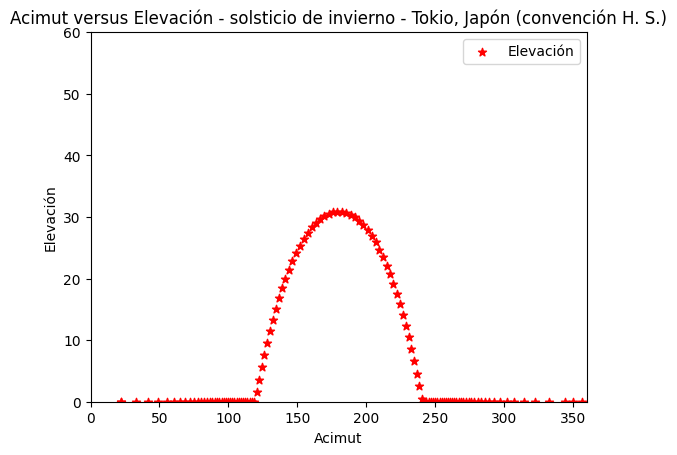

In [2774]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

"""azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio sur
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio sur
"""
plt.figure()
plt.scatter(azimut_invierno, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Tokio, Japón (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

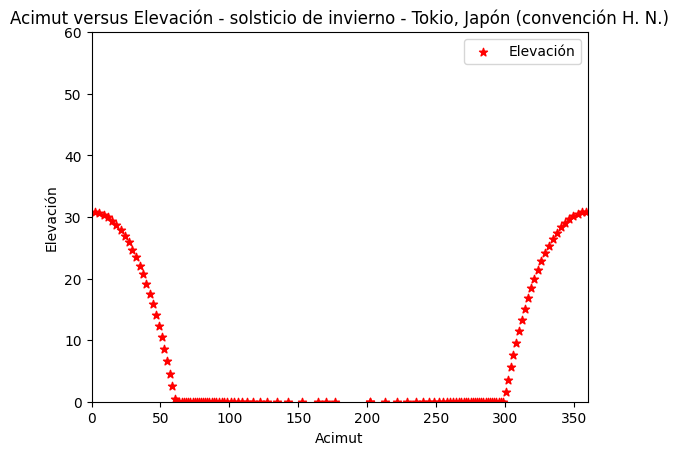

In [2775]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_invierno_c_n = []

for x in azimut_invierno:
    if  0 <= x <= 180:
        azimut_invierno_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_invierno_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_invierno_c_n, elevacion_invierno, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - solsticio de invierno - Tokio, Japón (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 60])
plt.show()

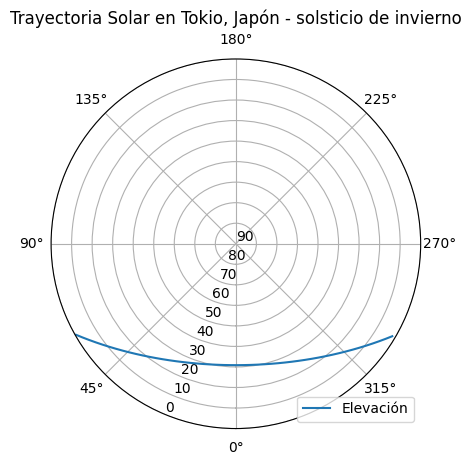

In [2776]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_invierno_2 = np.array(elevacion_invierno) > 0
az_rad1m = np.radians(np.array(azimut_invierno_c_n))[elevacion_invierno_2]
elevacion_invierno_2 = np.array(elevacion_invierno)[elevacion_invierno_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_invierno_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Tokio, Japón - solsticio de invierno")
ax.legend(loc= "lower right")
plt.show()

In [2777]:
# Finalmente, el equinoccio de marzo

elevacion_equinoccio = []
azimut_equinoccio = []
indicencia_equinoccio = []
cenit_equinoccio = [] # lista vacía para guardar los datos

horas = [] # lista vacía para graficar después
i = 0

while i <= 24:
    i = i + 0.2
    horas.append(i)

for hora in equinoccio_marzo:
    declin = declinacion(equinoccio_marzo.day_of_year[0])
    tsolar = t_solar(hora.hour + hora.minute/60, longtokio, long_std(9), equinoccio_marzo.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(lattokio, declin, w)
    azimut = azimut_solar(w, cenit, declin, lattokio)
    incid = incidencia(cenit, 0, azimut, 0)
    
    elevacion_equinoccio.append(90-cenit)
    azimut_equinoccio.append(azimut)
    indicencia_equinoccio.append(incid)
    cenit_equinoccio.append(cenit)

for i in elevacion_equinoccio:
    if i < 0:
        elevacion_equinoccio[elevacion_equinoccio.index(i)] = 0 # reemplazar los negativos por 0

for i in cenit_equinoccio:
    if i > 90:
        cenit_equinoccio[cenit_equinoccio.index(i)] = 90 # reemplazar los mayores a 90 por 90

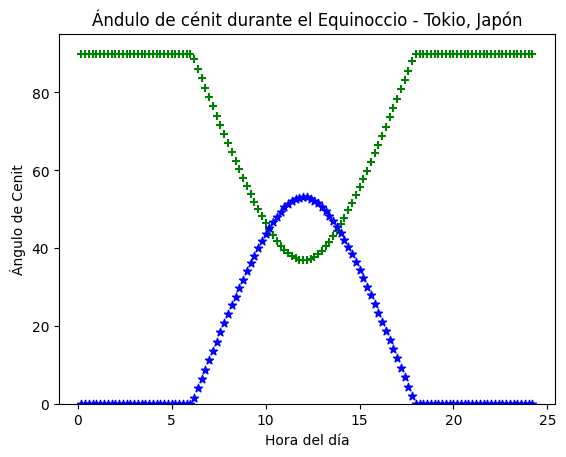

In [2778]:
# Gráfico de cénit y elevación según el tiempo

plt.figure()
#plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_equinoccio, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_equinoccio, label='Elevacion', c='blue', marker='*')
plt.xlabel('Hora del día')
plt.ylabel('Ángulo de Cenit')
plt.title('Ándulo de cénit durante el Equinoccio - Tokio, Japón')
plt.ylim([0, 95])
plt.show()

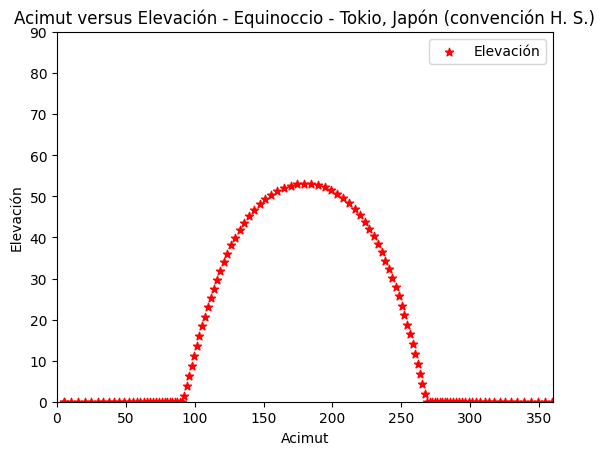

In [2779]:
# Gráfico de Azimut - Elevación Solar - Convención H.S.

# azimut_equinoccio_c_n = []

#for x in azimut_equinoccio:
#    if  0 <= x <= 180:
#        azimut_equinoccio_c_n.append(x+180) # convención hemisferio sur
#    else:
#        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio sur

plt.figure()
plt.scatter(azimut_equinoccio, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Tokio, Japón (convención H. S.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

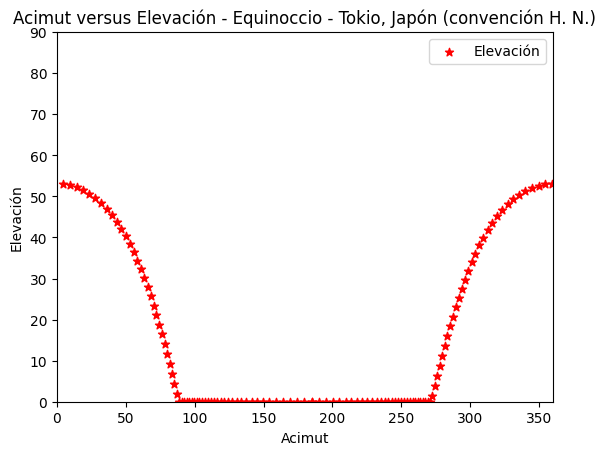

In [2780]:
# Gráfico de Azimut - Elevación Solar - convención H.N.

azimut_equinoccio_c_n = []

for x in azimut_equinoccio:
    if  0 <= x <= 180:
        azimut_equinoccio_c_n.append(x+180) # convención hemisferio norte
    else:
        azimut_equinoccio_c_n.append(x - 180) # convención hemisferio norte

plt.figure()
plt.scatter(azimut_equinoccio_c_n, elevacion_equinoccio, label='Elevación', c='red', marker='*')
plt.xlabel('Acimut')
plt.ylabel('Elevación')
plt.title('Acimut versus Elevación - Equinoccio - Tokio, Japón (convención H. N.)')
plt.legend(loc = 'upper right')
plt.xlim([0, 360])
plt.ylim([0, 90])
plt.show()

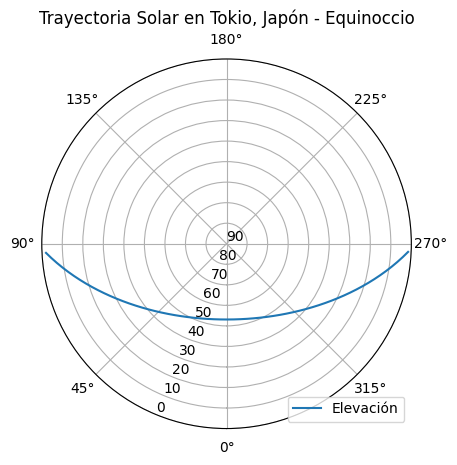

In [2781]:
# Gráfico en coordenadas polares de la trayectoria solar

# La convención en este gráfico es de Hemisferio Norte

elevacion_equinoccio_2 = np.array(elevacion_equinoccio) > 0
az_rad1m = np.radians(np.array(azimut_equinoccio_c_n))[elevacion_equinoccio_2]
elevacion_equinoccio_2 = np.array(elevacion_equinoccio)[elevacion_equinoccio_2]

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)
ax.plot(az_rad1m, elevacion_equinoccio_2, label='Elevación')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('S')
ax.grid(True)
ax.set_rlim(bottom = 90, top = 0)
ax.set_title("Trayectoria Solar en Tokio, Japón - Equinoccio")
ax.legend(loc= "lower right")
plt.show()